### Sampling Distributions and Confidence interval

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
coffee_full =  pd.read_csv('coffee_dataset.csv')
coffee_full.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [97]:
coffee_red = coffee_full.sample(200)
coffee_red.head()

,user_id,age,drinks_coffee,height
690,5459,>=21,False,71.852385
2233,5267,<21,False,60.214277
2217,3173,>=21,True,70.004900
1860,5693,<21,False,66.759551
1285,4108,>=21,True,67.879670


In [98]:
coffee_full.shape, coffee_red.shape

((2974, 4), (200, 4))

In [99]:
coffee_red.drinks_coffee.mean()

0.59

In [100]:
coffee_red.groupby('drinks_coffee').height.mean()

drinks_coffee
False    66.312851
True     68.550521
Name: height, dtype: float64

In [101]:
# get the bootsample

bootsample = coffee_red.sample(200, replace=True)
bootsample.head()

,user_id,age,drinks_coffee,height
1472,1855,>=21,True,68.329307
568,6210,>=21,True,68.652147
1971,5903,>=21,True,66.982187
1421,2829,>=21,True,66.146256
168,7839,>=21,True,69.408458


In [102]:
bootsample.groupby('drinks_coffee').height.mean()

drinks_coffee
False    66.453133
True     68.772643
Name: height, dtype: float64

In [103]:
(bootsample.query('drinks_coffee')['height']).mean()

68.77264322644987

In [104]:
(bootsample.query('drinks_coffee == False')['height']).mean()

66.45313258349208

In [105]:
boot_means = []
for _ in range(10000):
    bootsample = coffee_red.sample(200, replace=True)
    boot_means.append((bootsample.query('drinks_coffee')['height']).mean())

In [106]:
np.array(boot_means).mean()

68.55139105715504

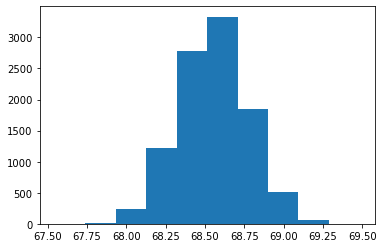

In [107]:
plt.hist(boot_means);

In [108]:
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(68.1223319086371, 68.97965083086996)

In [109]:
(coffee_full.query('drinks_coffee')['height']).mean()

68.40021025548401

### Confidence Intervals - Part I

First let's read in the necessary libraries and the dataset.  You also have the full and reduced versions of the data available.  The reduced version is an example of you would actually get in practice, as it is the sample.  While the full data is an example of everyone in your population.

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.

`1.` What is the proportion of coffee drinkers in the sample?  What is the proportion of individuals that don't drink coffee?

In [111]:
coffee_red.drinks_coffee.mean(), 1-coffee_red.drinks_coffee.mean()

(0.595, 0.405)

`2.` Of the individuals who drink coffee, what is the average height? Of the individuals who do not drink coffee, what is the average height?

In [112]:
coffee_red.groupby('drinks_coffee').height.mean()

drinks_coffee
False    66.784923
True     68.119630
Name: height, dtype: float64

`3.` Simulate 200 "new" individuals from your original sample of 200.  What are the proportion of coffee drinkers in your bootstrap sample?  How about individuals that don't drink coffee?

In [113]:
bootsample = coffee_red.sample(200, replace=True)

In [114]:
bootsample.drinks_coffee.mean(), 1-bootsample.drinks_coffee.mean()

(0.605, 0.395)

`4.` Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. Each bootstrap sample should be from the very first sample of 200 data points. Plot the distribution, and pull the values necessary for a 95% confidence interval.  What do you notice about the sampling distribution of the mean in this example?

In [115]:
boot_means = []
for _ in range(10000):
    bootsample = coffee_red.sample(200, replace=True)
    boot_means.append((bootsample.query('drinks_coffee == False')['height']).mean())

In [116]:
np.array(boot_means).mean()

66.7806168324155

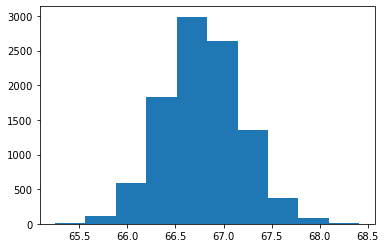

In [117]:
plt.hist(boot_means);

`5.`  Did your interval capture the actual average height of non-coffee drinkers in the population?  Look at the average in the population and the two bounds provided by your 95% confidence interval, and then answer the final quiz question below.

In [118]:
np.percentile(boot_means, 2.5), np.percentile(boot_means, 97.5)

(65.9929132815752, 67.58402738281573)

In [119]:
(coffee_full.query('drinks_coffee == False')['height']).mean()

66.44340776214705

### What is the difference in the mean height for coffee and non coffee drinkers?

In [120]:
coffee_full = pd.read_csv('coffee_dataset.csv')
coffee_red = coffee_full.sample(200) #this is the only data you might actually get in the real world.

In [121]:
bootsample = coffee_red.sample(200, replace=True)

In [122]:
mean_coff = (bootsample.query('drinks_coffee')['height']).mean()
mean_nocoff = (bootsample.query('drinks_coffee == False')['height']).mean()
mean_coff - mean_nocoff

0.9440439815979857

In [123]:
diff = []
for _ in range(10000):
    bootsample = coffee_red.sample(200, replace=True)
    mean_coff = (bootsample.query('drinks_coffee')['height']).mean()
    mean_nocoff = (bootsample.query('drinks_coffee == False')['height']).mean()
    diff.append(mean_coff - mean_nocoff)

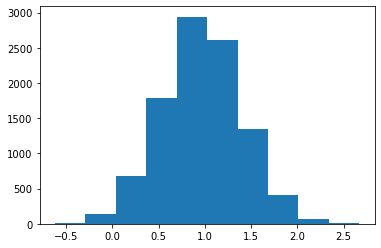

In [124]:
plt.hist(diff);

In [125]:
np.percentile(diff, 2.5), np.percentile(diff, 97.5)

(0.11288907462358361, 1.7984182512908633)

### There is difference between coffee and non-coffee drinkers. The coffee drinkers are taller than non-coffee drinkers.

### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

In [127]:
diff = []
for _ in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    mean_coff = (bootsample.query('drinks_coffee')['height']).mean()
    mean_nocoff = (bootsample.query('drinks_coffee == False')['height']).mean()
    diff.append(mean_coff - mean_nocoff)

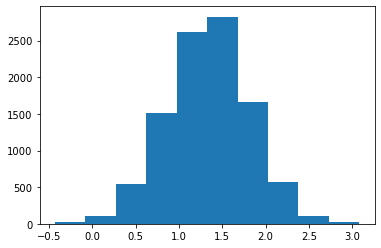

In [128]:
plt.hist(diff);

In [129]:
np.percentile(diff, 0.5), np.percentile(diff, 99.5)

(0.10258900080921124, 2.538833370796657)

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

In [130]:
diff = []
for _ in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    mean_coff = (bootsample.query('age == ">=21"')['height']).mean()
    mean_nocoff = (bootsample.query('age == "<21"')['height']).mean()
    diff.append(mean_coff - mean_nocoff)

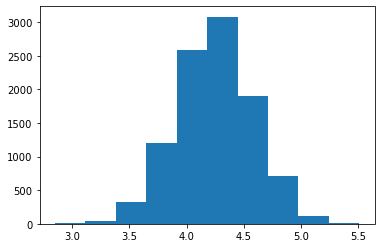

In [131]:
plt.hist(diff);

In [132]:
np.percentile(diff, 0.5), np.percentile(diff, 99.5)

(3.3652749452554795, 5.0932450670661495)

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [133]:
diff = []
for _ in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    mean_coff = (bootsample.query('drinks_coffee & age == "<21"')['height']).mean()
    mean_nocoff = (bootsample.query('drinks_coffee == False & age == "<21"')['height']).mean()
    diff.append(mean_coff - mean_nocoff)

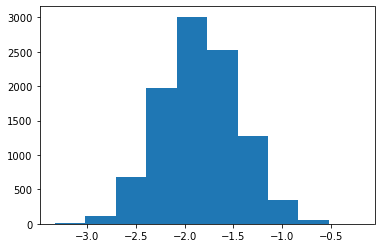

In [134]:
plt.hist(diff);

In [135]:
np.percentile(diff, 0.5), np.percentile(diff, 99.5)

(-2.8261056080904683, -0.8221780317576606)

`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

In [136]:
diff = []
for _ in range(10000):
    bootsample = sample_data.sample(200, replace=True)
    mean_coff = (bootsample.query('drinks_coffee & age == ">=21"')['height']).mean()
    mean_nocoff = (bootsample.query('drinks_coffee == False & age == ">=21"')['height']).mean()
    diff.append(mean_coff - mean_nocoff)

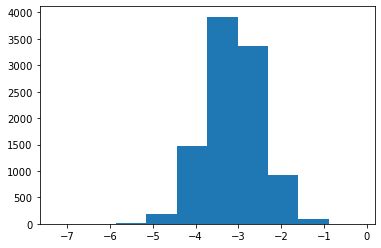

In [137]:
plt.hist(diff);

In [138]:
np.percentile(diff, 0.5), np.percentile(diff, 99.5)

(-4.809151113239108, -1.4309574773988463)

### Traditional Confidence interval

Confidence intervals and Hypothesis testing

T-Test, Two Sample T-Test, Paried T-test, Z-test, Chi-Squared Test, F-Test